In [1]:
# get train and valid imgids
train_imgids = set()
valid_imgids = set()
with open("../data/img_attr.csv", 'r') as fin:
    for line in fin:
        fields = line.strip().split("\t")
        if len(fields) != 7:
            continue
        imgid, zan_num, cai_num, clk_num, hotness, datestamp, title = fields
        if datestamp >= "2015/01" and datestamp < "2017/04":
            train_imgids.add(imgid)
        elif datestamp >= "2017/04" and datestamp < "2017/05":
            valid_imgids.add(imgid)

print "Size of train set: %d"%len(train_imgids)
print "Size of valid set: %d"%len(valid_imgids)

Size of train set: 101514
Size of valid set: 6101


In [2]:
# classify each image for train and valid
delta = 1.5

train_pos_imgids = []
train_neg_imgids = []
valid_pos_imgids = []
valid_neg_imgids = []
with open("../data/img_score.csv", 'r') as fin:
    for line in fin:
        fields = line.strip().split("\t")
        if len(fields) != 2:
            continue
        imgid, score = fields
        if imgid in train_imgids:
            if float(score) > delta:
                train_pos_imgids.append(imgid)
            elif float(score) < -delta:
                train_neg_imgids.append(imgid)
        if imgid in valid_imgids:
            if float(score) > 0:
                valid_pos_imgids.append(imgid)
            elif float(score) < 0:
                valid_neg_imgids.append(imgid)
print "num of high-quality image for train: %d"%len(train_pos_imgids)
print "num of low-quality image for train: %d"%len(train_neg_imgids)
print "num of high-quality image for valid: %d"%len(valid_pos_imgids)
print "num of low-quality image for valid: %d"%len(valid_neg_imgids)

num of high-quality image for train: 5544
num of low-quality image for train: 5229
num of high-quality image for valid: 3231
num of low-quality image for valid: 2843


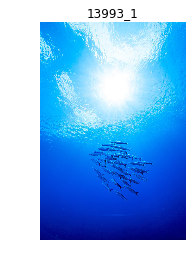

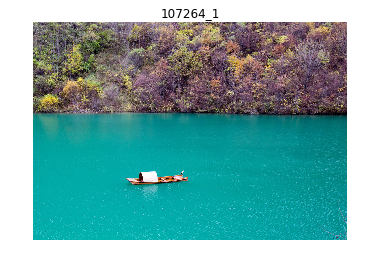

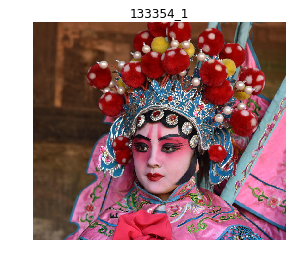

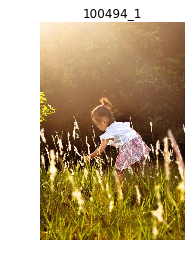

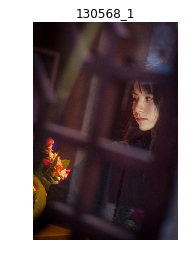

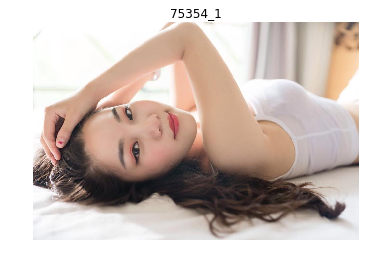

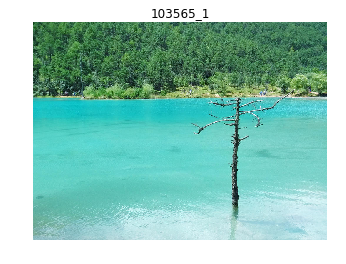

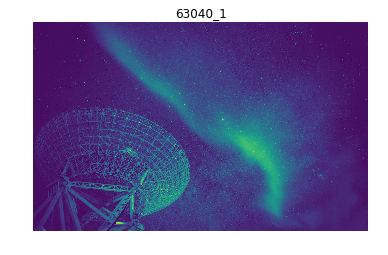

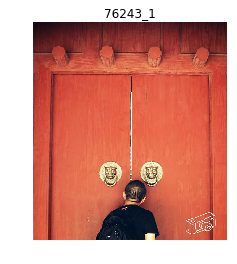

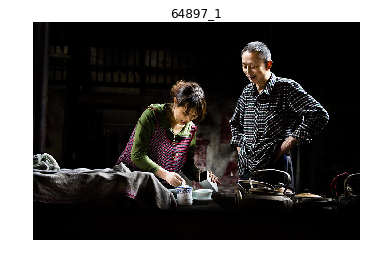

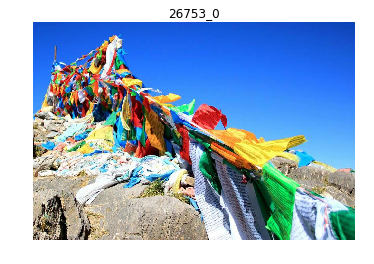

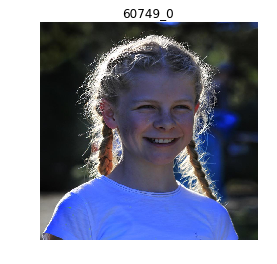

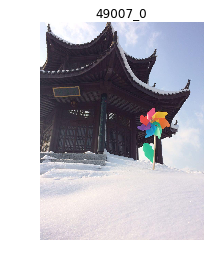

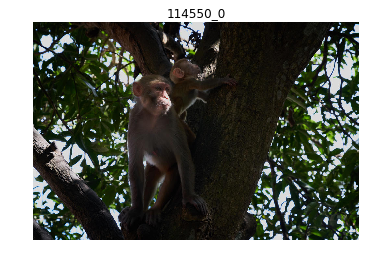

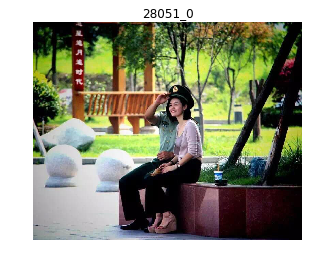

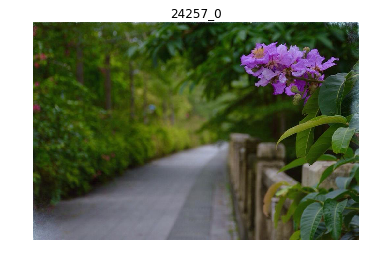

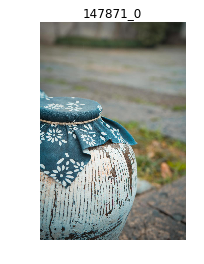

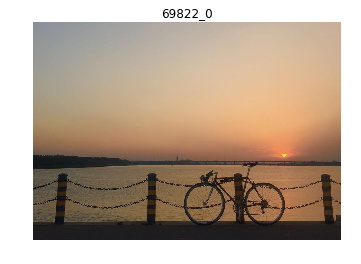

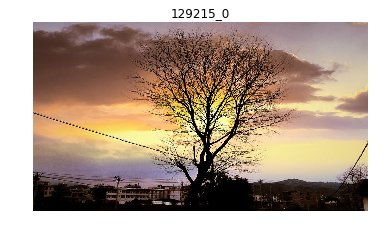

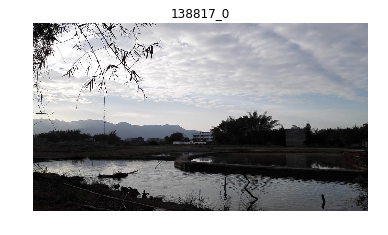

In [6]:
# demo show
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import random

img_path = "../data/img/"
def testPlot(imgid, label):
    plt.figure()
    
    plt.title("%s_%s"%(imgid, label))
    img = Image.open(img_path+"%s.jpg"%imgid)
    plt.imshow(img)
    plt.axis('off')
    
    plt.show()
    
for imgid in random.sample(train_pos_imgids, 10):
    testPlot(imgid, 1)
    
for imgid in random.sample(train_neg_imgids, 10):
    testPlot(imgid, 0)

In [5]:
# copy image to subdirectory
import os
import shutil

train_data_path = "./data/train/"
valid_data_path = "./data/valid/"

for imgid in train_pos_imgids:
    if os.path.exists("../data/img/%s.jpg"%imgid):
        shutil.copyfile("../data/img/%s.jpg"%imgid, train_data_path+"/1/%s.jpg"%imgid)

for imgid in train_neg_imgids:
    if os.path.exists("../data/img/%s.jpg"%imgid):
        shutil.copyfile("../data/img/%s.jpg"%imgid, train_data_path+"/0/%s.jpg"%imgid)
        
for imgid in valid_pos_imgids:
    if os.path.exists("../data/img/%s.jpg"%imgid):
        shutil.copyfile("../data/img/%s.jpg"%imgid, valid_data_path+"/1/%s.jpg"%imgid)

for imgid in valid_neg_imgids:
    if os.path.exists("../data/img/%s.jpg"%imgid):
        shutil.copyfile("../data/img/%s.jpg"%imgid, valid_data_path+"/0/%s.jpg"%imgid)